In [1]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Manual :(
def diffy1(x, y):
  return y[1]

def diffy2(x, y):
  return y[2]

# contoh foto bapak 
def diffy3(x, y):
  return -y[0]-3*y[1]-3*y[2]-4*mt.sin(x)


systems = []
systems.append(diffy1)
systems.append(diffy2)
systems.append(diffy3)



## Using Euler Method

In [3]:
X_MAX = 6
iX = 0
iY = [1, 1, -1]
stepSize = 0.25
systemSize = len(systems)

ArrayX = []
ArrayX.append(iX)

ArrayY = [None]*systemSize

for i in range(systemSize):
  ArrayY[i]=[]
  ArrayY[i].append(iY[i])

ArrayF = [None]*systemSize

for i in range(systemSize):
  ArrayF[i]=[]
  ArrayF[i].append(0)

for i in range(int(X_MAX/stepSize)):
    iX+=stepSize
    ArrayX.append(iX)

    for j in range(systemSize):
      ArrayF[j].append(systems[j](iX, [ArrayY[0][i], ArrayY[1][i], ArrayY[2][i]]))
      ArrayY[j].append(ArrayY[j][i]+ systems[j](iX, [ArrayY[0][i], ArrayY[1][i], ArrayY[2][i]])*stepSize)




In [4]:
data = {'xi':ArrayX}
for i in range(systemSize):
  data['y'+str(1+i)+'i']= ArrayY[i] 
for i in range(systemSize):
  data['f'+str(1+i)+'i']= ArrayF[i] 

df = pd.DataFrame(data)
df

,xi,y1i,y2i,y3i,f1i,f2i,f3i
0,0.00,1.00,1.00,-1.00,0.00,0.00,0.00
1,0.25,1.25,0.75,-1.50,1.00,-1.00,-1.99
2,0.50,1.44,0.38,-1.73,0.75,-1.50,-0.93
3,0.75,1.53,-0.06,-1.75,0.38,-1.73,-0.10
4,1.00,1.52,-0.50,-1.62,-0.06,-1.75,0.54
5,1.25,1.39,-0.90,-1.36,-0.50,-1.62,1.03
6,1.50,1.17,-1.24,-1.01,-0.90,-1.36,1.40
7,1.75,0.86,-1.49,-0.60,-1.24,-1.01,1.65
8,2.00,0.48,-1.64,-0.15,-1.49,-0.60,1.78
9,2.25,0.07,-1.68,0.29,-1.64,-0.15,1.79


## Plot graph

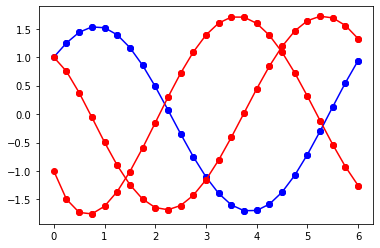

In [5]:
# Plot Euler
for j in range(systemSize):
  for i in range(0, len(ArrayX)):
    if(j==0):
      plt.plot(ArrayX[i:i+2],ArrayY[j][i:i+2],'ok-', color="blue")
    else:
      plt.plot(ArrayX[i:i+2],ArrayY[j][i:i+2],'ok-', color="red")


plt.show() 